In [22]:
from eda import *



In today's world, with everything being digital and computerized, we see language more like science that can be studied.  Therefore, creating methods for feeding language to inanimate objects like computers has become crucial. NLP aids in this process.

Common exemples are; spellchecker find syntax mistakes that you would have missed on your own, our search engine figure out what you were going to write just on the first few letters. Another one is when our computers authomatically detects some emails as Spams. In this caes our email service undertands the content of the email then determines whether to designate it as spam or not.

Natural language processing, or NLP, is concerned with how machines can comprehend, manipulate, and produce natural language.  NLP is therefore genuinely at the nexus of linguistics and computer science. It centers on the capacity of robots to communicate directly with people.

As part of our Machine Learning coarse, we have to undertake a course project to develop an end-to-end pipeline that process' an essay and outputs a grade describing the level of English proficiency.
In short, train a model that predicts an essay’s rating.

Before we get deep into coding and modeling we need to understand your dataset and gain insights that can guide further processing and modeling. 

Our training data set contains 12978 essays classified in 8 different data sets according to the writers' grade level (Grade 7 to 10) and essay types (persuasive/narrative/expository or source dependent responses). Essay sets 1,2,7 and 8 are persuasive/narrative/expository while essay sets 3,4,5,6 are persuasive/narrative/expository.   

In termes of numbers of essays, the first 7 essay sets are quite evenly distributed and are between 1569 and 1805 essays. Essay set 5 is the largest with 1805 essays and essay set 8 is the smallest with 723 esays.



In [23]:
fp = FilePaths()
df = pd.read_csv(fp.training_data)
df.head()

,essay_id,essay_set,essay,Score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [25]:

# Add a new column 'Word Count' to your DataFrame
df['Word Count'] = df['essay'].apply(count_words)

# Display the DataFrame with the added 'Word Count' column
print(df[['essay_id', 'essay_set', 'essay', 'Score', 'Word Count']])

       essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12973     21626          8   In most stories mothers and daughters are eit...   
12974     21628          8   I never understood the meaning laughter is th...   
12975     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12976     21630          8                                 Trippin' on fen...   
12977     21633          8   Many people believe that laughter can improve...   

       Score  Word Count  


In [26]:
df.describe()

,essay_id,essay_set,Score,essay_length,Word Count
count,12978.000000,12978.000000,12978.000000,12978.000000,12978.000000
mean,10295.432809,4.179458,6.885730,1215.820542,222.660425
std,6308.588616,2.136749,9.259188,958.301852,175.921852
min,1.000000,1.000000,0.000000,8.000000,2.000000
25%,4439.250000,2.000000,2.000000,527.000000,98.000000
50%,10045.500000,4.000000,3.000000,900.000000,163.000000
75%,15680.750000,6.000000,8.000000,1670.000000,307.000000
max,21633.000000,8.000000,60.000000,6098.000000,1064.000000


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   essay_id      12978 non-null  int64 
 1   essay_set     12978 non-null  int64 
 2   essay         12978 non-null  object
 3   Score         12978 non-null  int64 
 4   essay_length  12978 non-null  int64 
 5   Word Count    12978 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 608.5+ KB
None


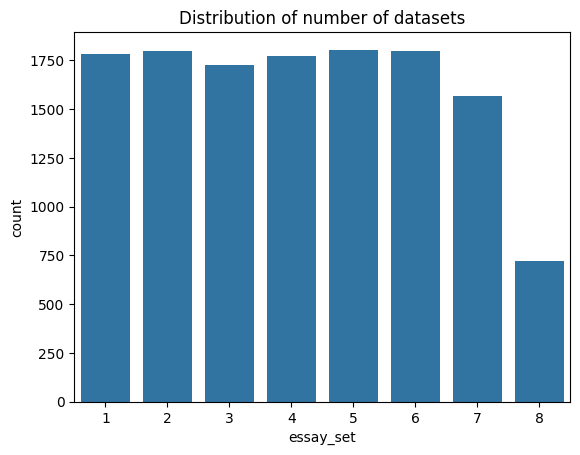

In [29]:
sns.countplot(x='essay_set', data=df)
plt.title('Distribution of number of datasets')
plt.show()

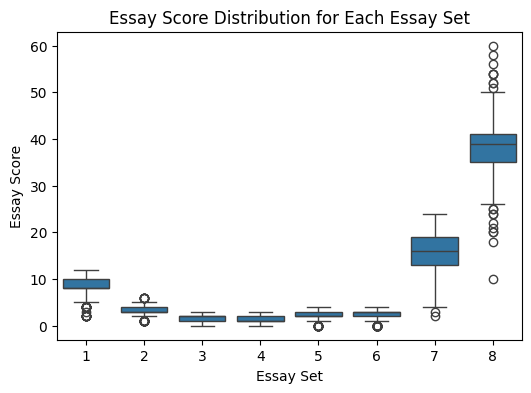

In [31]:
# Essay Score Analysis for Each Essay Set
plt.figure(figsize=(6, 4))
sns.boxplot(x='essay_set', y='Score', data=df)
plt.title('Essay Score Distribution for Each Essay Set')
plt.xlabel('Essay Set')
plt.ylabel('Essay Score')
plt.show()


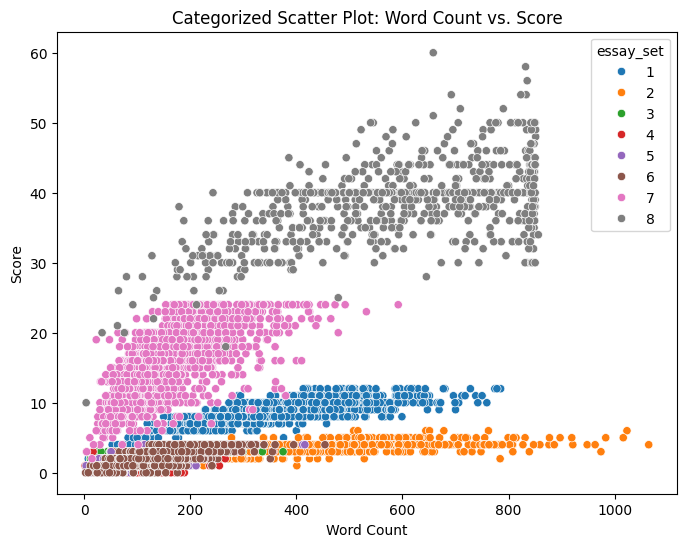

In [40]:

# Create a custom palette with unique colors for each essay set
custom_palette = sns.color_palette("tab10", n_colors=len(df['essay_set'].unique()))

# Create a scatter plot with custom colors
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Word Count', y='Score', hue='essay_set', palette=custom_palette, data=df)
plt.title('Categorized Scatter Plot: Word Count vs. Score')
plt.xlabel('Word Count')
plt.ylabel('Score')
plt.show()


In this graph we see that essay set 1 which was written by Grade 8 pupils has low scores (less than 15) and the essay lengths can reach 4800 words, while essay set 7 written by Grade 7 are relatively all short in length and (less than 3000 words) but a good number of essays have scores between 10 an 25. Essay set 6 of type source dependent responses has low scores (less than 15) and short essays too (less than 2000 words).

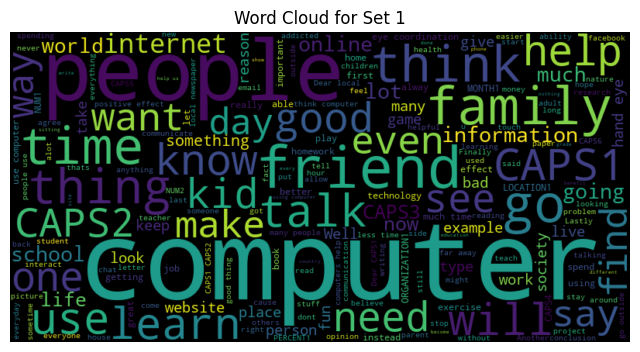

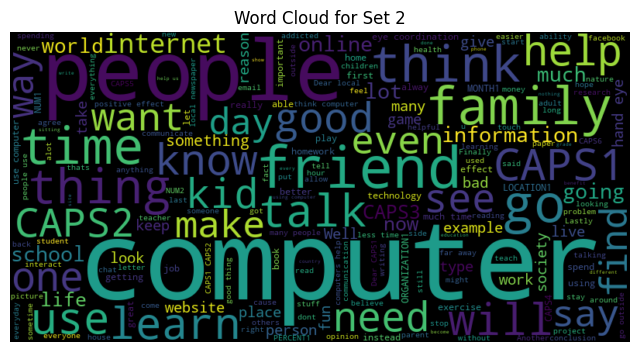

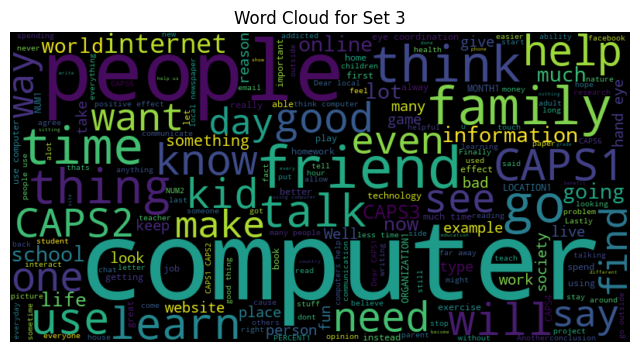

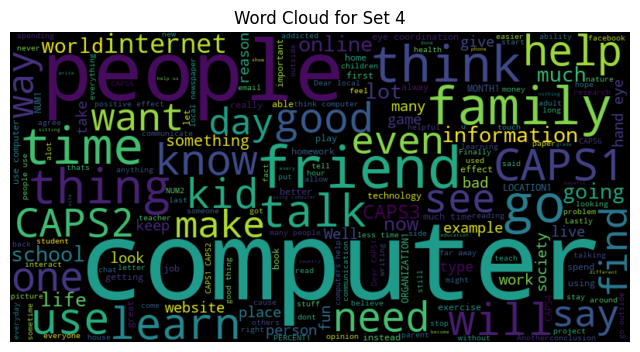

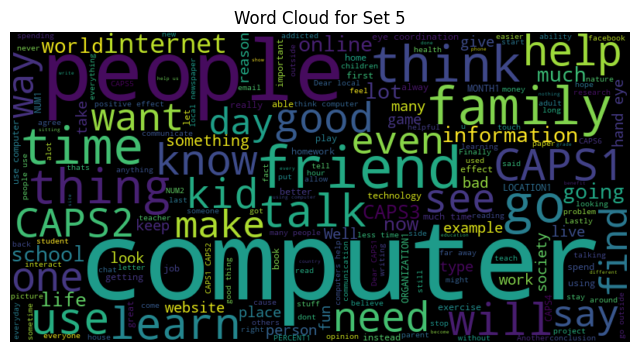

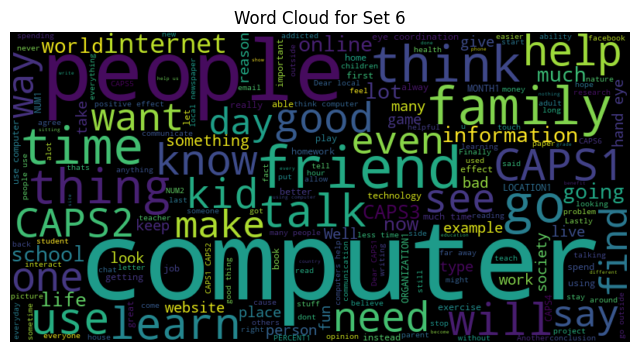

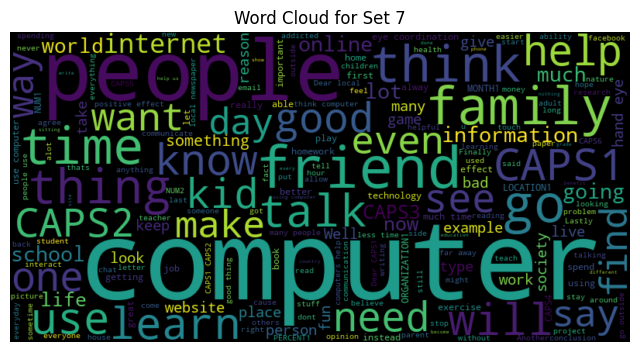

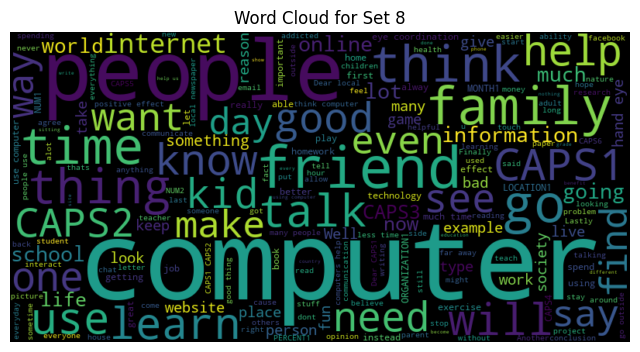

In [41]:
# Generate word cloud for each grade
esset = df['essay_set'].unique()
for esset in esset:
    text = ' '.join(df[df['Score'] == 8]['essay'])
    wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Set {esset}')
    plt.axis('off')
    plt.show()

In [43]:


# Display statistical description for the entire dataset
overall_stats = df.describe().transpose().reset_index()
print("Overall Statistical Description:")
print(tabulate(overall_stats, headers='keys', tablefmt='pretty', showindex=False))

Overall Statistical Description:
+--------------+---------+--------------------+-------------------+-----+---------+---------+----------+---------+
|    index     |  count  |        mean        |        std        | min |   25%   |   50%   |   75%    |   max   |
+--------------+---------+--------------------+-------------------+-----+---------+---------+----------+---------+
|   essay_id   | 12978.0 | 10295.432809369702 | 6308.588616381008 | 1.0 | 4439.25 | 10045.5 | 15680.75 | 21633.0 |
|  essay_set   | 12978.0 | 4.1794575435352135 | 2.136749047581581 | 1.0 |   2.0   |   4.0   |   6.0    |   8.0   |
|    Score     | 12978.0 | 6.885729696409308  | 9.259188310528176 | 0.0 |   2.0   |   3.0   |   8.0    |  60.0   |
| essay_length | 12978.0 | 1215.8205424564649 | 958.3018521224989 | 8.0 |  527.0  |  900.0  |  1670.0  | 6098.0  |
|  Word Count  | 12978.0 | 222.66042533518262 | 175.9218515191019 | 2.0 |  98.0   |  163.0  |  307.0   | 1064.0  |
+--------------+---------+--------------------+

In [44]:
# Create an empty DataFrame to store the combined results
combined_stats = pd.DataFrame()

# Display statistical distribution of scores for each essay set
for essay_set in df['essay_set'].unique():
    subset = df[df['essay_set'] == essay_set]
    
    essay_set_stats = subset['Score'].describe(percentiles=[]).reset_index()
    
    # Add percentiles separately
    percentiles = subset['Score'].quantile([0.25, 0.5, 0.75]).reset_index()
    percentiles.columns = ['Statistic', 'Score']
    
    # Add additional statistics
    additional_stats = subset['Score'].agg(['min', 'mean', 'max', 'std']).reset_index()
    additional_stats.columns = ['Statistic', 'Score']
    
    # Concatenate all statistics
    essay_set_stats = pd.concat([essay_set_stats, percentiles, additional_stats], ignore_index=True)
    
    # Add a column for essay set
    essay_set_stats['Essay Set'] = essay_set
    
    # Concatenate with the combined_stats DataFrame
    combined_stats = pd.concat([combined_stats, essay_set_stats], ignore_index=True)

# Pivot the combined table
pivot_table = combined_stats.pivot_table(index=['Essay Set'], columns='Statistic', values='Score', aggfunc='first').reset_index()

# Display the pivoted table
print(" Statistical Distribution of Scores for All Essay Sets:")
print(tabulate(pivot_table, headers='keys', tablefmt='pretty', showindex=False))


 Statistical Distribution of Scores for All Essay Sets:
+-----------+------+------+------+------+--------------------+------+--------------------+
| Essay Set | 0.25 | 0.5  | 0.75 | max  |        mean        | min  |        std         |
+-----------+------+------+------+------+--------------------+------+--------------------+
|    1.0    | 8.0  | 8.0  | 10.0 | 12.0 | 8.528323051037576  | 2.0  | 1.5385651641273865 |
|    2.0    | 3.0  | 3.0  | 4.0  | 6.0  | 3.4155555555555557 | 1.0  | 0.7745121451983336 |
|    3.0    | 1.0  | 2.0  | 2.0  | 3.0  | 1.8482039397450754 | 0.0  | 0.8151569359752313 |
|    4.0    | 1.0  | 1.0  | 2.0  | 3.0  |  1.43058690744921  | 0.0  | 0.9404824109075983 |
|    5.0    | 2.0  | 2.0  | 3.0  | 4.0  | 2.4088642659279778 | 0.0  | 0.9708210150783264 |
|    6.0    | 2.0  | 3.0  | 3.0  | 4.0  |        2.72        | 0.0  | 0.9706304146738546 |
|    7.0    | 13.0 | 16.0 | 19.0 | 24.0 | 16.062460165710643 | 2.0  | 4.585349820279469  |
|    8.0    | 35.0 | 39.0 | 41.0 |

When we look at the scores, we see that essay set 8 has the highest score of 60 and the min is 0 in essay sets 3,4,5,6. 
The data set 8 which contains essays written by the Grade 10 also has the highest mean score of 38.5 and the highest standard deviation of 5.6 wich shows a high distribution of the scores. Data set 7 which was written by Grade 7 follows with has a mean of 16.06 and a standard deviation of 4.5. Essat set 4 has the lowest mean score of 1.43 and has a low standard deviation of  0.94.


In [46]:
# Create an empty DataFrame to store the combined results
combined_stats = pd.DataFrame()

# Display statistical distribution of scores for each essay set
for essay_set in df['essay_set'].unique():
    subset = df[df['essay_set'] == essay_set]
    
    essay_set_stats = subset['Word Count'].describe(percentiles=[]).reset_index()
    
    # Add percentiles separately
    percentiles = subset['Word Count'].quantile([0.25, 0.5, 0.75]).reset_index()
    percentiles.columns = ['Statistic', 'Word Count']
    
    # Add additional statistics
    additional_stats = subset['Word Count'].agg(['min', 'mean', 'max', 'std']).reset_index()
    additional_stats.columns = ['Statistic', 'Word Count']
    
    # Concatenate all statistics
    essay_set_stats = pd.concat([essay_set_stats, percentiles, additional_stats], ignore_index=True)
    
    # Add a column for essay set
    essay_set_stats['Essay Set'] = essay_set
    
    # Concatenate with the combined_stats DataFrame
    combined_stats = pd.concat([combined_stats, essay_set_stats], ignore_index=True)

# Pivot the combined table
pivot_table = combined_stats.pivot_table(index=['Essay Set'], columns='Statistic', values='Word Count', aggfunc='first').reset_index()

# Display the pivoted table
print("Statistical Distribution of Word Count for All Essay Sets:")
print(tabulate(pivot_table, headers='keys', tablefmt='pretty', showindex=False))


Statistical Distribution of Word Count for All Essay Sets:
+-----------+--------+-------+--------+--------+--------------------+------+--------------------+
| Essay Set |  0.25  |  0.5  |  0.75  |  max   |        mean        | min  |        std         |
+-----------+--------+-------+--------+--------+--------------------+------+--------------------+
|    1.0    | 286.5  | 365.0 | 441.0  | 785.0  | 365.68087492989343 | 8.0  | 119.6103133440794  |
|    2.0    | 278.75 | 368.0 | 470.25 | 1064.0 | 380.74833333333333 | 31.0 | 156.17710082862703 |
|    3.0    |  67.0  | 100.5 | 146.0  | 375.0  | 108.64252607184241 | 10.0 | 53.26562607272733  |
|    4.0    |  54.0  | 87.0  | 127.0  | 357.0  | 94.37189616252822  | 2.0  | 51.66735413218164  |
|    5.0    |  80.0  | 119.0 | 158.0  | 416.0  | 122.13019390581718 | 4.0  | 57.314718376607885 |
|    6.0    | 117.0  | 153.0 | 188.0  | 454.0  | 153.29833333333335 | 3.0  | 55.76727826086541  |
|    7.0    | 105.0  | 154.0 | 215.0  | 592.0  | 168.184193

A deep study of the number of words (length) of the essays show that, essay set 4 has the smallest essay (8.0) while essay set 8 has the longest essay (6098). All the data sets have high standard deviations between 285.8 (essay set 4) and 1082.2 (essay set 1082.2). 

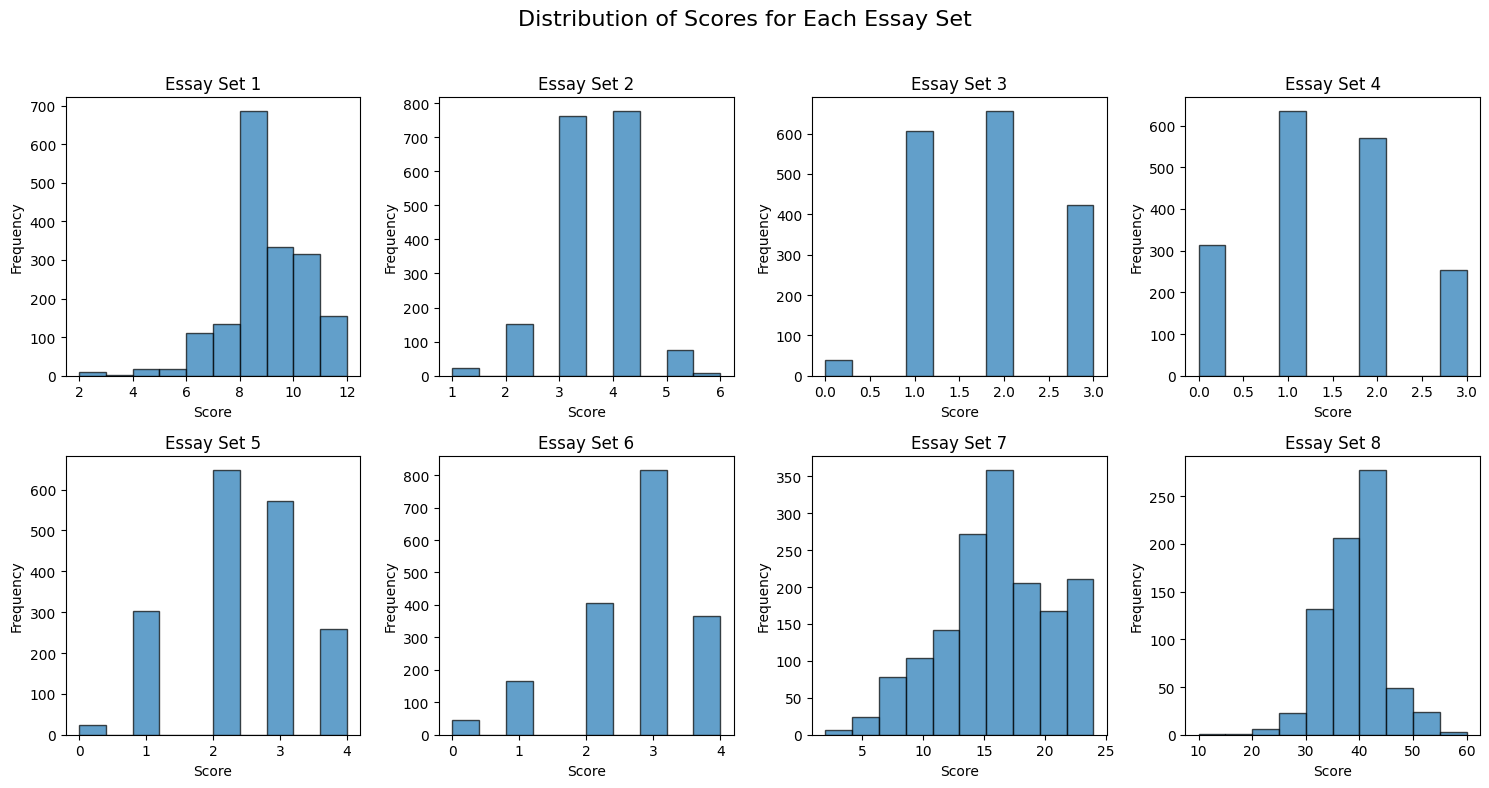

In [47]:
# Create a subplot for 2 rows and 4 columns (8 essay sets)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distribution of Scores for Each Essay Set', fontsize=16)

# Iterate through each essay set and create a bar chart
for i, essay_set in enumerate(df['essay_set'].unique()):
    ax = axes[i // 4, i % 4]  # Set the current subplot
    
    subset = df[df['essay_set'] == essay_set]
    
    # Plot the distribution of scores
    ax.hist(subset['Score'], bins=10, edgecolor='black', alpha=0.7)
    
    ax.set_title(f'Essay Set {essay_set}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

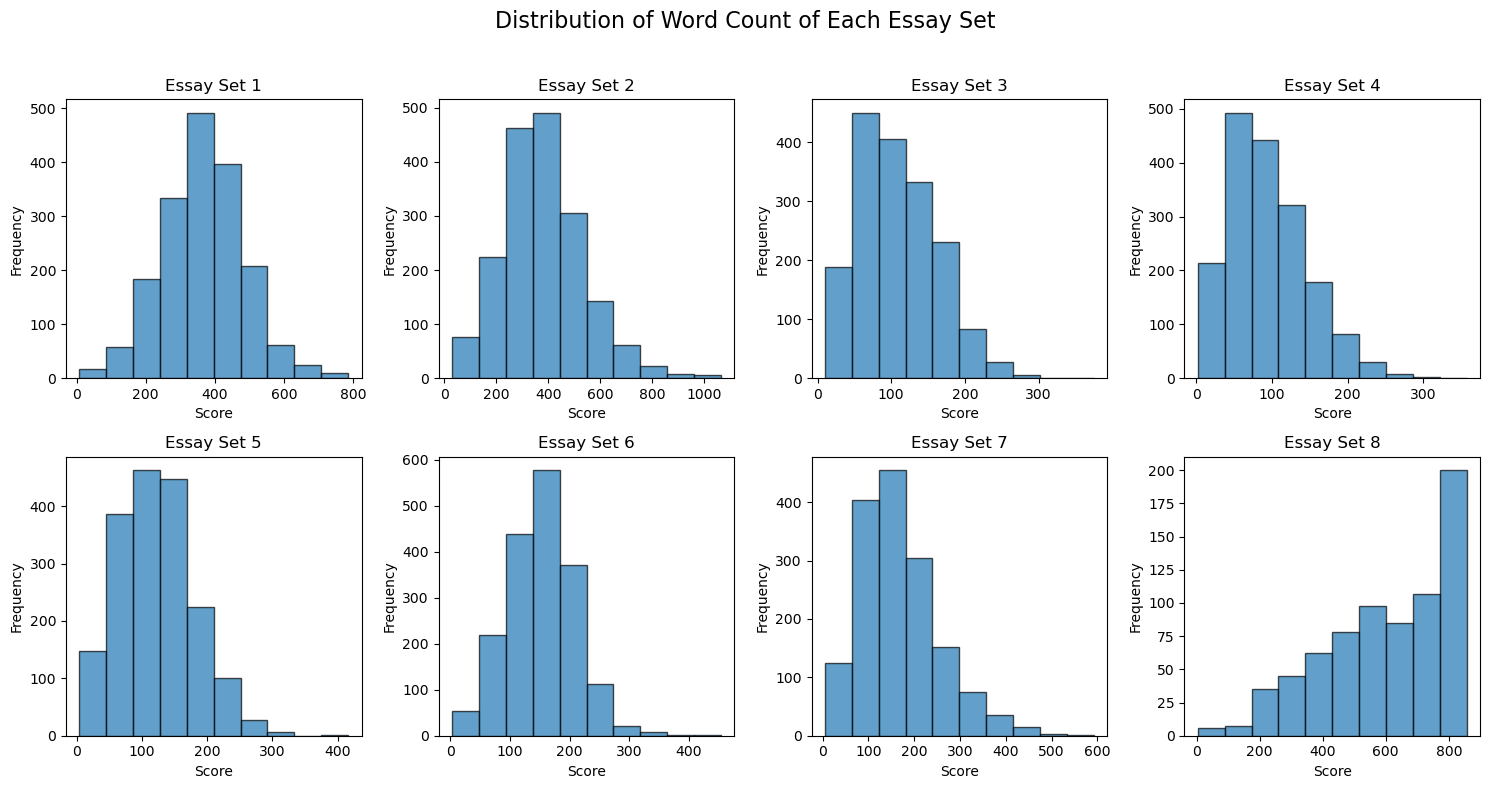

In [108]:
# Create a subplot for 2 rows and 4 columns (8 essay sets)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distribution of Word Count of Each Essay Set', fontsize=16)

# Iterate through each essay set and create a bar chart
for i, essay_set in enumerate(df['essay_set'].unique()):
    ax = axes[i // 4, i % 4]  # Set the current subplot
    
    subset = df[df['essay_set'] == essay_set]
    
    # Plot the distribution of scores
    ax.hist(subset['Word Count'], bins=10, edgecolor='black', alpha=0.7)
    
    ax.set_title(f'Essay Set {essay_set}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()